In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import pandas as pd
import numpy as np
import wordcloud as wd
import textblob as tb
import matplotlib.pyplot as plt
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# **TMC specific analysis**

In [7]:
dtmc=pd.read_csv('../input/tweets-before-west-bengalindia-elections-2021/tmc.csv')
dtmc.head()

,Tweet,Geo,Location
0,RT @swarnalisarkar: Didi's Sarkar Raj ... 80 y...,NaN,kota rajasthan
1,#Breaking | TMC expected to announce its full ...,NaN,India
2,RT @keyakahe: Hypocrisy of TMC -\nPart-2 \n\nM...,NaN,"Bihar, India"
3,"RT @thewire_in: After the RJD and SP, the Shiv...",NaN,NaN
4,RT @PTI_News: Shiv Sena extends support to TMC...,NaN,"New Delhi, India"


In [8]:
loc=dtmc.iloc[:,2]
geo=dtmc.iloc[:,1]
area=loc.append([geo])
area.describe()

count     22296
unique     4808
top       India
freq       3105
dtype: object

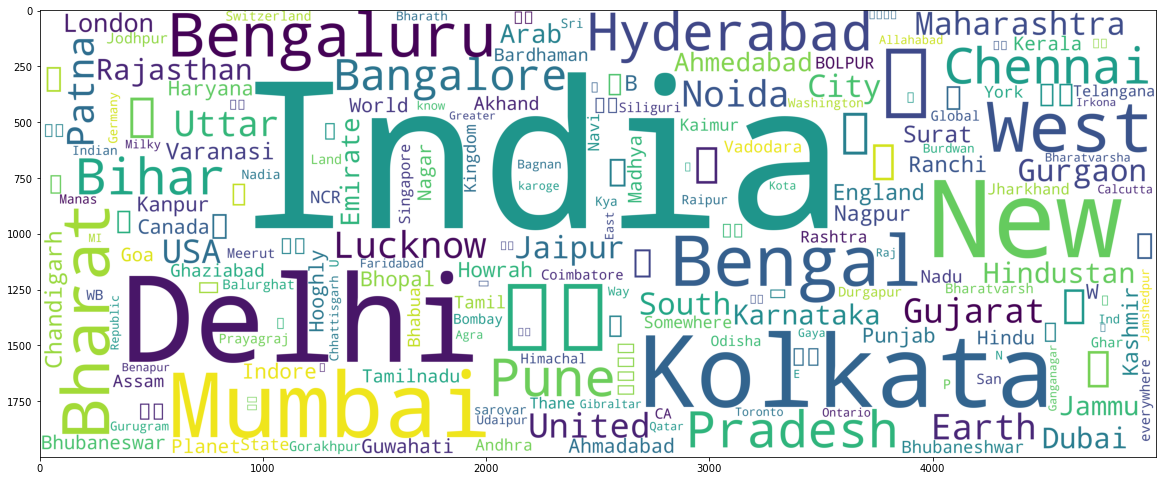

In [9]:
area=area.str.cat(sep=' ')

wc = wd.WordCloud(width=5000,height=2000,background_color='white',min_font_size=10,collocations=False).generate(area)
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.show()

In [10]:
def preproc(text):
    clean_text=''
    words=text.split(' ')
    l=len(words)
    i=0
    while i<l:
        word=words[i]
#         if word[0] in ['@','#']:
#             clean_text+=word[1:]+' '
#             i+=1
        if word=='RT':
            i+=2
        elif 'http' in word or 'HTTP' in word:
            i+=1
        else:
            clean_text+=word+' '
            i+=1
    clean_text=re.sub('[^A-Za-z0-9\s]','',clean_text)
    clean_text=re.sub('\n',' ',clean_text)
    return clean_text     

dtmc['Clean Tweet']=dtmc['Tweet'].apply(preproc)
dtmc.head()

,Tweet,Geo,Location,Clean Tweet
0,RT @swarnalisarkar: Didi's Sarkar Raj ... 80 y...,NaN,kota rajasthan,Didis Sarkar Raj 80 years old beaten by TMC g...
1,#Breaking | TMC expected to announce its full ...,NaN,India,Breaking TMC expected to announce its full ca...
2,RT @keyakahe: Hypocrisy of TMC -\nPart-2 \n\nM...,NaN,"Bihar, India",Hypocrisy of TMC Part2 Mamata Banerjee body...
3,"RT @thewire_in: After the RJD and SP, the Shiv...",NaN,NaN,After the RJD and SP the Shiv Sena on Thursday...
4,RT @PTI_News: Shiv Sena extends support to TMC...,NaN,"New Delhi, India",Shiv Sena extends support to TMC supremo Mamat...


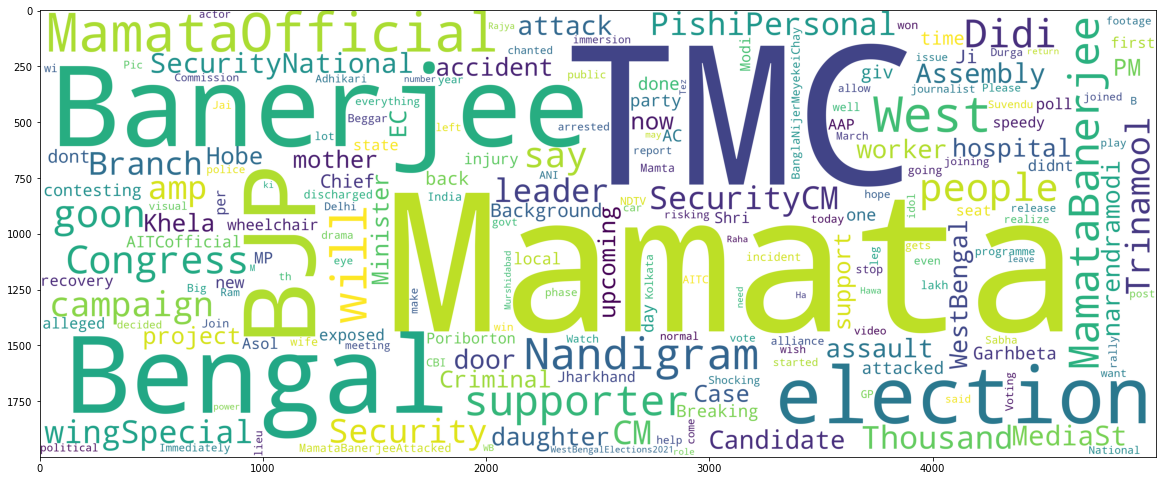

In [11]:
twt=dtmc['Clean Tweet'].str.cat(sep=' ')
tw_cloud = wd.WordCloud(width=5000,height=2000,background_color='white',min_font_size=10,collocations=False).generate(twt)
plt.figure(figsize=(20,20))
plt.imshow(tw_cloud)
plt.show()

In [12]:
pol=[]
sub=[]
pos_sent=0
neg_sent=0
ntr_sent=0
subj=0
objv=0
ntr=0
v_pol_neg=[]
v_pol_pos=[]
vpos=0
vneg=0
vntr=0
sid=SentimentIntensityAnalyzer()
l=len(dtmc['Clean Tweet'])
for i in range(l):
    blob=tb.TextBlob(dtmc['Clean Tweet'][i])
    sent=blob.sentiment
    pl=sent.polarity
    sb=sent.subjectivity
    pol.append(pl)
    sub.append(sb)
    if pl>0:
        pos_sent+=1
    elif pl<0:
        neg_sent+=1
    else:
        ntr_sent+=1
    if sb>0.5:
        subj+=1
    elif sb<0.5:
        objv+=1
    else:
        ntr+=1
    pol_score=sid.polarity_scores(dtmc['Clean Tweet'][i])
    if pol_score['pos']>pol_score['neg']:
        vpos+=1
    elif pol_score['pos']<pol_score['neg']:
        vneg+=1
    else:
        vntr+=1
    v_pol_neg.append(pol_score['pos'])
    v_pol_pos.append(pol_score['neg'])



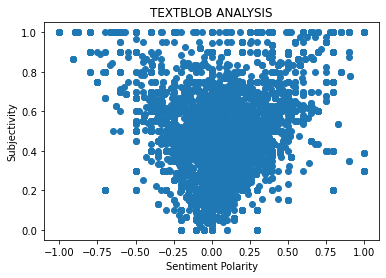

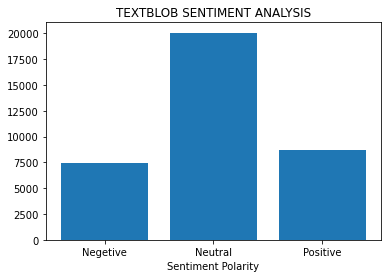

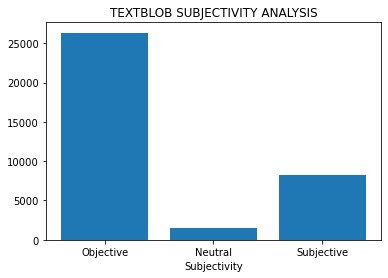

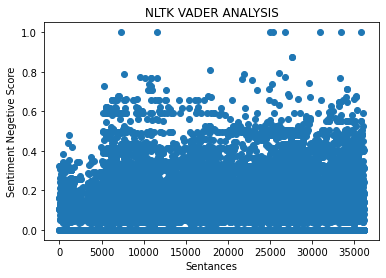

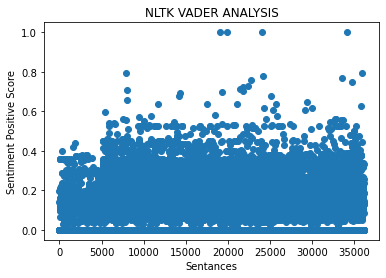

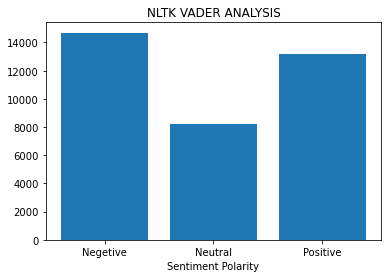

In [13]:
plt.scatter(pol,sub)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Subjectivity')
plt.title('TEXTBLOB ANALYSIS')
plt.show()
    
plt.bar(['Negetive','Neutral','Positive'],[neg_sent,ntr_sent,pos_sent])
plt.xlabel('Sentiment Polarity')
plt.title('TEXTBLOB SENTIMENT ANALYSIS')
plt.show()

plt.bar(['Objective','Neutral','Subjective'],[objv,ntr,subj])
plt.xlabel('Subjectivity')
plt.title('TEXTBLOB SUBJECTIVITY ANALYSIS')
plt.show()

plt.scatter([i for i in range(len(v_pol_neg))],v_pol_neg)
plt.xlabel('Sentances')
plt.ylabel('Sentiment Negetive Score')
plt.title('NLTK VADER ANALYSIS')
plt.show()

plt.scatter([i for i in range(len(v_pol_pos))],v_pol_pos)
plt.xlabel('Sentances')
plt.ylabel('Sentiment Positive Score')
plt.title('NLTK VADER ANALYSIS')
plt.show()
    
plt.bar(['Negetive','Neutral','Positive'],[vneg,vntr,vpos])
plt.xlabel('Sentiment Polarity')
plt.title('NLTK VADER ANALYSIS')
plt.show()

# **BJP specific analysis**

In [14]:
dbjp=pd.read_csv('../input/tweets-before-west-bengalindia-elections-2021/bjp.csv')
dbjp.head()

,Tweet,Geo,Location
0,RT @SaketGokhale: Why is Saradha Scam accused ...,NaN,NaN
1,RT @SaketGokhale: How Saradha Scam accused Muk...,NaN,NaN
2,@narendramodi @YashwantSinha @AmitShah @AmitSh...,NaN,NaN
3,Congrats,NaN,"Uttar Pradesh, India"
4,RT @BachchuHansda: BJP Bengal President Dilip ...,NaN,NaN


In [15]:
loc=dbjp.iloc[:,2]
geo=dbjp.iloc[:,1]
area=loc.append([geo])
area.describe()

count      2563
unique      835
top       India
freq        315
dtype: object

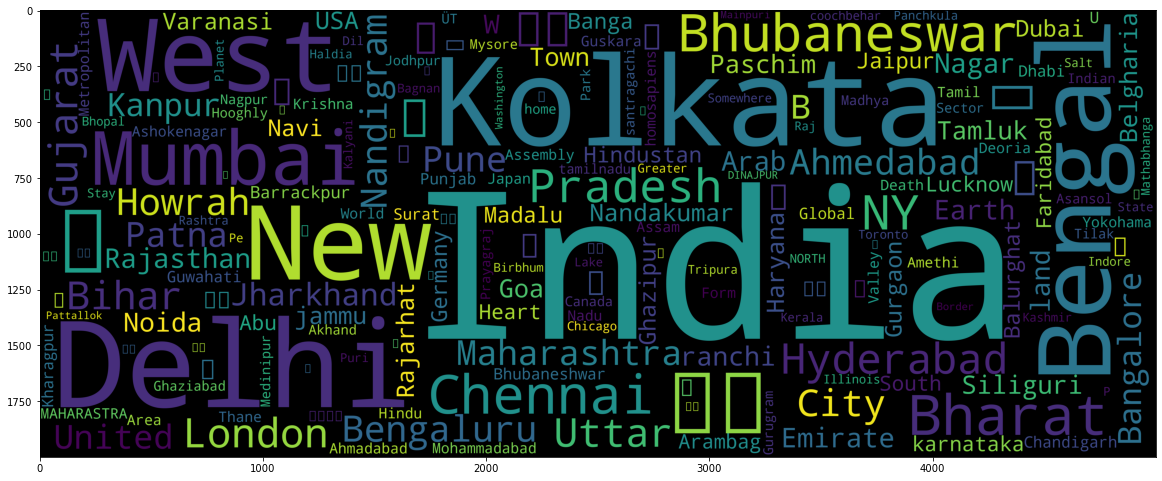

In [16]:
area=area.str.cat(sep=' ')

wc = wd.WordCloud(width=5000,height=2000,background_color='black',min_font_size=10,collocations=False).generate(area)
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.show()

In [17]:
def preproc(text):
    clean_text=''
    words=text.split(' ')
    l=len(words)
    i=0
    while i<l:
        word=words[i]
#         if word[0] in ['@','#']:
#             clean_text+=word[1:]+' '
#             i+=1
        if word=='RT':
            i+=2
        elif 'http' in word or 'HTTP' in word:
            i+=1
        else:
            clean_text+=word+' '
            i+=1
    clean_text=re.sub('[^A-Za-z0-9\s]','',clean_text)
    clean_text=re.sub('\n',' ',clean_text)
    return clean_text     

dbjp['Clean Tweet']=dbjp['Tweet'].apply(preproc)
dbjp.head()

,Tweet,Geo,Location,Clean Tweet
0,RT @SaketGokhale: Why is Saradha Scam accused ...,NaN,NaN,Why is Saradha Scam accused Mukul Roy being al...
1,RT @SaketGokhale: How Saradha Scam accused Muk...,NaN,NaN,How Saradha Scam accused Mukul Roy is living o...
2,@narendramodi @YashwantSinha @AmitShah @AmitSh...,NaN,NaN,narendramodi YashwantSinha AmitShah AmitShahOf...
3,Congrats,NaN,"Uttar Pradesh, India",Congrats
4,RT @BachchuHansda: BJP Bengal President Dilip ...,NaN,NaN,BJP Bengal President Dilip Ghosh has disrespec...


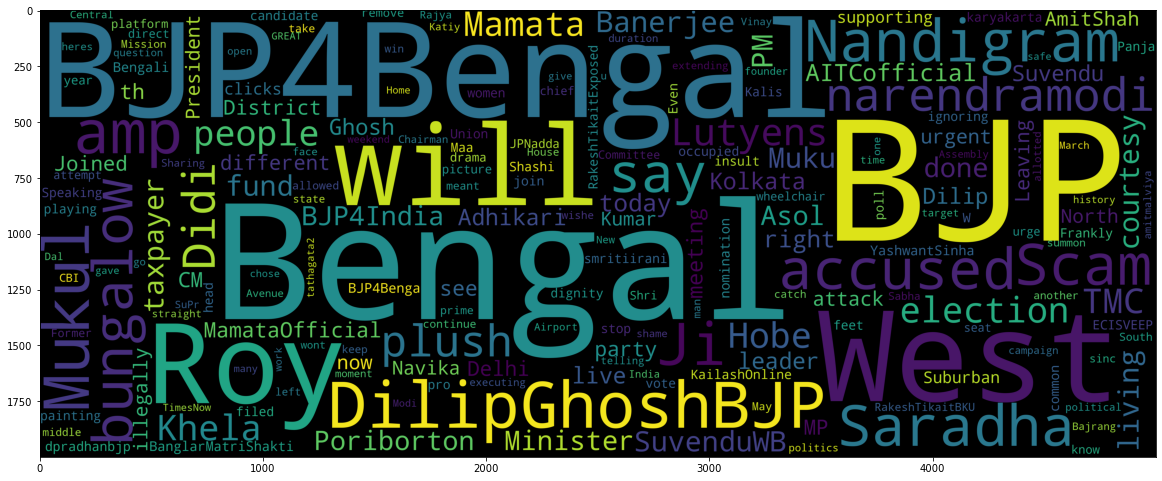

In [18]:
twt=dbjp['Clean Tweet'].str.cat(sep=' ')
tw_cloud = wd.WordCloud(width=5000,height=2000,background_color='black',min_font_size=10,collocations=False).generate(twt)
plt.figure(figsize=(20,20))
plt.imshow(tw_cloud)
plt.show()

In [19]:
pol=[]
sub=[]
pos_sent=0
neg_sent=0
ntr_sent=0
subj=0
objv=0
ntr=0
v_pol_neg=[]
v_pol_pos=[]
vpos=0
vneg=0
vntr=0
sid=SentimentIntensityAnalyzer()
l=len(dbjp['Clean Tweet'])
for i in range(l):
    blob=tb.TextBlob(dbjp['Clean Tweet'][i])
    sent=blob.sentiment
    pl=sent.polarity
    sb=sent.subjectivity
    pol.append(pl)
    sub.append(sb)
    if pl>0:
        pos_sent+=1
    elif pl<0:
        neg_sent+=1
    else:
        ntr_sent+=1
    if sb>0.5:
        subj+=1
    elif sb<0.5:
        objv+=1
    else:
        ntr+=1
    pol_score=sid.polarity_scores(dbjp['Clean Tweet'][i])
    if pol_score['pos']>pol_score['neg']:
        vpos+=1
    elif pol_score['pos']<pol_score['neg']:
        vneg+=1
    else:
        vntr+=1
    v_pol_neg.append(pol_score['pos'])
    v_pol_pos.append(pol_score['neg'])



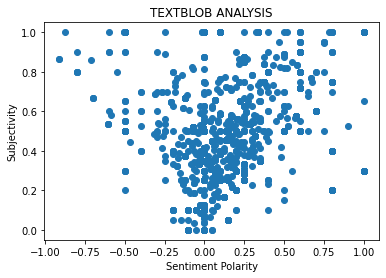

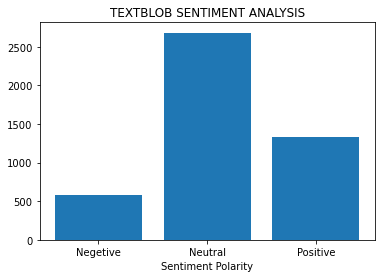

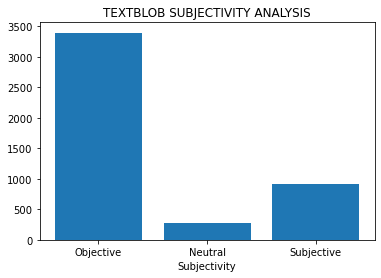

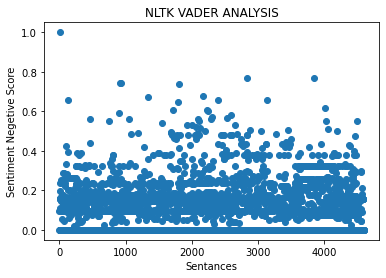

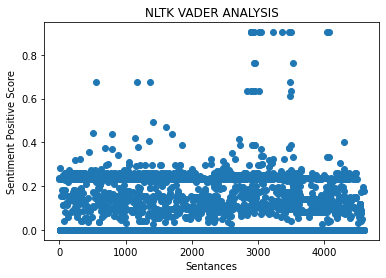

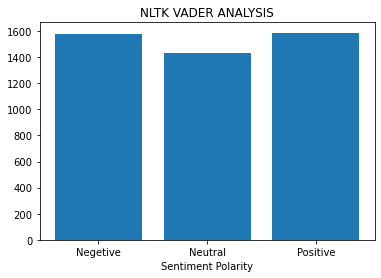

In [20]:
plt.scatter(pol,sub)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Subjectivity')
plt.title('TEXTBLOB ANALYSIS')
plt.show()
    
plt.bar(['Negetive','Neutral','Positive'],[neg_sent,ntr_sent,pos_sent])
plt.xlabel('Sentiment Polarity')
plt.title('TEXTBLOB SENTIMENT ANALYSIS')
plt.show()

plt.bar(['Objective','Neutral','Subjective'],[objv,ntr,subj])
plt.xlabel('Subjectivity')
plt.title('TEXTBLOB SUBJECTIVITY ANALYSIS')
plt.show()

plt.scatter([i for i in range(len(v_pol_neg))],v_pol_neg)
plt.xlabel('Sentances')
plt.ylabel('Sentiment Negetive Score')
plt.title('NLTK VADER ANALYSIS')
plt.show()

plt.scatter([i for i in range(len(v_pol_pos))],v_pol_pos)
plt.xlabel('Sentances')
plt.ylabel('Sentiment Positive Score')
plt.title('NLTK VADER ANALYSIS')
plt.show()
    
plt.bar(['Negetive','Neutral','Positive'],[vneg,vntr,vpos])
plt.xlabel('Sentiment Polarity')
plt.title('NLTK VADER ANALYSIS')
plt.show()

# **Other alliance analysis**

In [21]:
dcpm=pd.read_csv('../input/tweets-before-west-bengalindia-elections-2021/other_parties_alliance.csv')
dcpm.head()

,Tweet,Geo,Location
0,"Owaisi works for BJP, says former West Bengal ...",NaN,NaN
1,RT @PragyaSingh: If you thought you knew what ...,NaN,NaN
2,@CPIM_WESTBENGAL By d way who's Abbas Siddique...,NaN,"Kolkata, India"
3,RT @bhasaby: Cong is allying with Badruddin Aj...,NaN,NaN
4,@Malcolm_Returns @CrescentDome @MabarSultanate...,NaN,"Kotchandpur, Bangladesh"


In [22]:
loc=dcpm.iloc[:,2]
geo=dcpm.iloc[:,1]
area=loc.append([geo])
area.describe()

count      1084
unique      545
top       India
freq        102
dtype: object

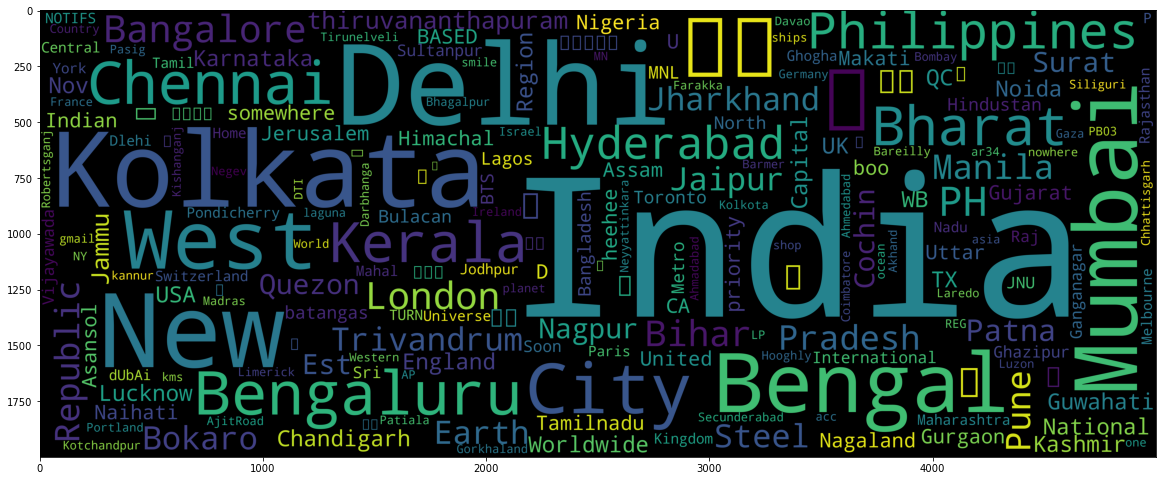

In [23]:
area=area.str.cat(sep=' ')

wc = wd.WordCloud(width=5000,height=2000,background_color='black',min_font_size=10,collocations=False).generate(area)
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.show()

In [24]:
def preproc(text):
    clean_text=''
    words=text.split(' ')
    l=len(words)
    i=0
    while i<l:
        word=words[i]
#         if word[0] in ['@','#']:
#             clean_text+=word[1:]+' '
#             i+=1
        if word=='RT':
            i+=2
        elif 'http' in word or 'HTTP' in word:
            i+=1
        else:
            clean_text+=word+' '
            i+=1
    clean_text=re.sub('[^A-Za-z0-9\s]','',clean_text)
    clean_text=re.sub('\n',' ',clean_text)
    return clean_text     

dcpm['Clean Tweet']=dcpm['Tweet'].apply(preproc)
dcpm.head()

,Tweet,Geo,Location,Clean Tweet
0,"Owaisi works for BJP, says former West Bengal ...",NaN,NaN,Owaisi works for BJP says former West Bengal M...
1,RT @PragyaSingh: If you thought you knew what ...,NaN,NaN,If you thought you knew what Abbas Siddiqui an...
2,@CPIM_WESTBENGAL By d way who's Abbas Siddique...,NaN,"Kolkata, India",CPIMWESTBENGAL By d way whos Abbas Siddique
3,RT @bhasaby: Cong is allying with Badruddin Aj...,NaN,NaN,Cong is allying with Badruddin AjmalAIDUF in A...
4,@Malcolm_Returns @CrescentDome @MabarSultanate...,NaN,"Kotchandpur, Bangladesh",MalcolmReturns CrescentDome MabarSultanate dun...


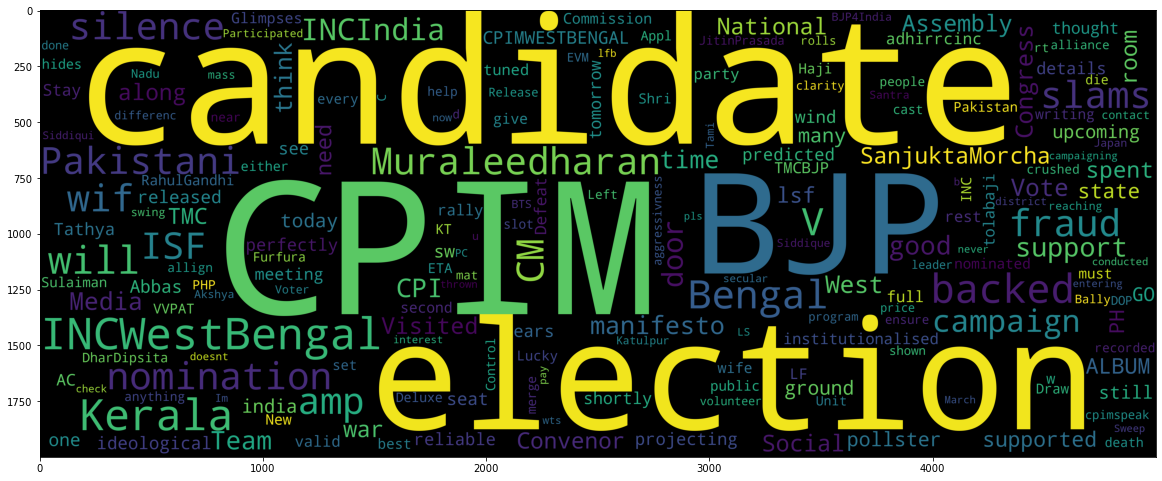

In [25]:
twt=dcpm['Clean Tweet'].str.cat(sep=' ')
tw_cloud = wd.WordCloud(width=5000,height=2000,background_color='black',min_font_size=10,collocations=False).generate(twt)
plt.figure(figsize=(20,20))
plt.imshow(tw_cloud)
plt.show()

In [26]:
pol=[]
sub=[]
pos_sent=0
neg_sent=0
ntr_sent=0
subj=0
objv=0
ntr=0
v_pol_neg=[]
v_pol_pos=[]
vpos=0
vneg=0
vntr=0
sid=SentimentIntensityAnalyzer()
l=len(dcpm['Clean Tweet'])
for i in range(l):
    blob=tb.TextBlob(dcpm['Clean Tweet'][i])
    sent=blob.sentiment
    pl=sent.polarity
    sb=sent.subjectivity
    pol.append(pl)
    sub.append(sb)
    if pl>0:
        pos_sent+=1
    elif pl<0:
        neg_sent+=1
    else:
        ntr_sent+=1
    if sb>0.5:
        subj+=1
    elif sb<0.5:
        objv+=1
    else:
        ntr+=1
    pol_score=sid.polarity_scores(dcpm['Clean Tweet'][i])
    if pol_score['pos']>pol_score['neg']:
        vpos+=1
    elif pol_score['pos']<pol_score['neg']:
        vneg+=1
    else:
        vntr+=1
    v_pol_neg.append(pol_score['pos'])
    v_pol_pos.append(pol_score['neg'])



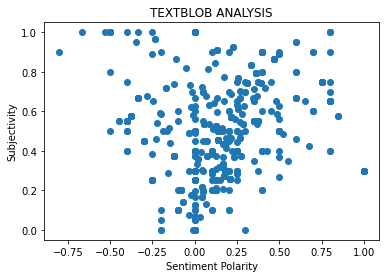

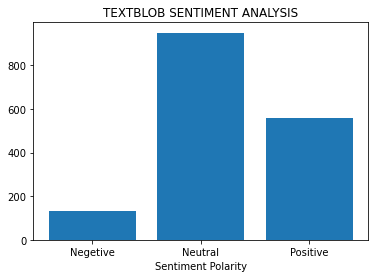

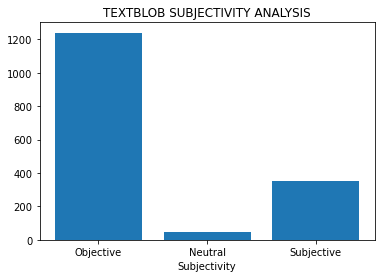

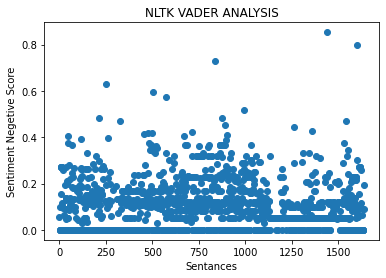

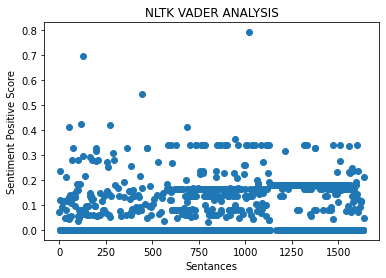

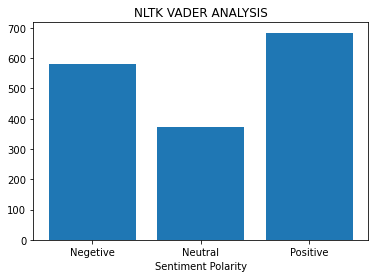

In [27]:
plt.scatter(pol,sub)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Subjectivity')
plt.title('TEXTBLOB ANALYSIS')
plt.show()
    
plt.bar(['Negetive','Neutral','Positive'],[neg_sent,ntr_sent,pos_sent])
plt.xlabel('Sentiment Polarity')
plt.title('TEXTBLOB SENTIMENT ANALYSIS')
plt.show()

plt.bar(['Objective','Neutral','Subjective'],[objv,ntr,subj])
plt.xlabel('Subjectivity')
plt.title('TEXTBLOB SUBJECTIVITY ANALYSIS')
plt.show()

plt.scatter([i for i in range(len(v_pol_neg))],v_pol_neg)
plt.xlabel('Sentances')
plt.ylabel('Sentiment Negetive Score')
plt.title('NLTK VADER ANALYSIS')
plt.show()

plt.scatter([i for i in range(len(v_pol_pos))],v_pol_pos)
plt.xlabel('Sentances')
plt.ylabel('Sentiment Positive Score')
plt.title('NLTK VADER ANALYSIS')
plt.show()
    
plt.bar(['Negetive','Neutral','Positive'],[vneg,vntr,vpos])
plt.xlabel('Sentiment Polarity')
plt.title('NLTK VADER ANALYSIS')
plt.show()